In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
original = pd.read_csv('data/champ_stat.csv')
original

,name,category,hp,ad,speed,range,mr,armor
0,Rengar,W,2205.00,122.00,1.1650,125,54.600,88.00
1,Yasuo,W,2089.00,117.60,1.0750,175,52.500,91.20
2,Riven,W,2106.48,118.00,1.2550,125,54.600,90.60
3,Evelynn,M,2084.00,115.00,1.0030,125,54.600,100.00
4,Ahri,M,2182.00,107.04,0.9850,550,39.000,93.88
5,Katarina,M,2294.00,115.60,1.1182,125,54.600,90.88
6,Mundo,T,2184.54,124.27,1.1290,125,54.600,99.00
7,Zac,T,2325.00,121.20,0.9130,175,54.500,96.00
8,Maokai,T,2275.00,122.94,1.0075,125,32.325,111.00
9,Caitlyn,A,2119.00,109.84,1.3450,650,39.000,91.00


In [4]:
df = original[["hp","ad","speed","range","mr","armor"]]
df

,hp,ad,speed,range,mr,armor
0,2205.00,122.00,1.1650,125,54.600,88.00
1,2089.00,117.60,1.0750,175,52.500,91.20
2,2106.48,118.00,1.2550,125,54.600,90.60
3,2084.00,115.00,1.0030,125,54.600,100.00
4,2182.00,107.04,0.9850,550,39.000,93.88
5,2294.00,115.60,1.1182,125,54.600,90.88
6,2184.54,124.27,1.1290,125,54.600,99.00
7,2325.00,121.20,0.9130,175,54.500,96.00
8,2275.00,122.94,1.0075,125,32.325,111.00
9,2119.00,109.84,1.3450,650,39.000,91.00


In [57]:
df2 = original[["ad", "range"]]
df2

,ad,range
0,122.00,125
1,117.60,175
2,118.00,125
3,115.00,125
4,107.04,550
5,115.60,125
6,124.27,125
7,121.20,175
8,122.94,125
9,109.84,650


In [5]:
df3 = original[["ad","range","hp"]]
df3

,ad,range,hp
0,122.00,125,2205.00
1,117.60,175,2089.00
2,118.00,125,2106.48
3,115.00,125,2084.00
4,107.04,550,2182.00
5,115.60,125,2294.00
6,124.27,125,2184.54
7,121.20,175,2325.00
8,122.94,125,2275.00
9,109.84,650,2119.00


In [6]:
df4 = original[["ad","range","mr"]]
df4

,ad,range,mr
0,122.00,125,54.600
1,117.60,175,52.500
2,118.00,125,54.600
3,115.00,125,54.600
4,107.04,550,39.000
5,115.60,125,54.600
6,124.27,125,54.600
7,121.20,175,54.500
8,122.94,125,32.325
9,109.84,650,39.000


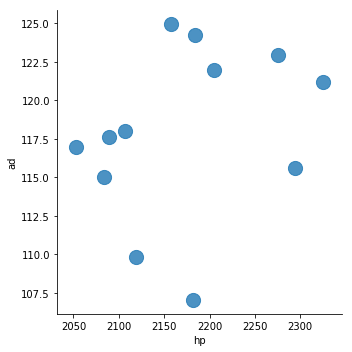

In [17]:
sns.lmplot('hp', 'ad', data=df, fit_reg=False, scatter_kws={'s':200})

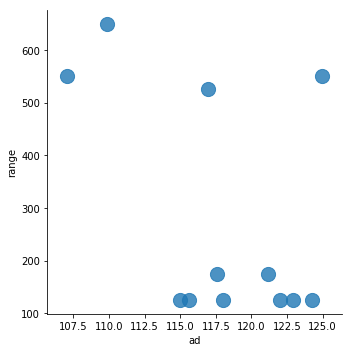

In [11]:
sns.lmplot('ad', 'range', data=df, fit_reg=False, scatter_kws={'s':200})

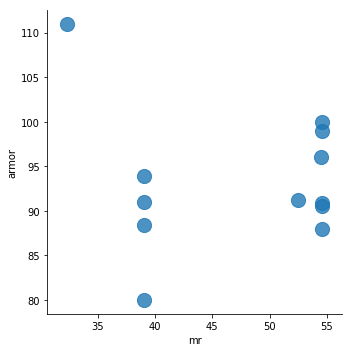

In [13]:
sns.lmplot('mr', 'armor', data=df, fit_reg=False, scatter_kws={'s':200})

In [7]:
data_points = df.values
kmeans = KMeans(n_clusters=4).fit(data_points)

In [8]:
kmeans.cluster_centers_

array([[2.12800000e+03, 1.14710000e+02, 1.08400000e+00, 5.68750000e+02,
        3.90000000e+01, 8.83200000e+01],
       [2.19477000e+03, 1.23135000e+02, 1.14700000e+00, 1.25000000e+02,
        5.46000000e+01, 9.35000000e+01],
       [2.09316000e+03, 1.16866667e+02, 1.11100000e+00, 1.41666667e+02,
        5.39000000e+01, 9.39333333e+01],
       [2.29800000e+03, 1.19913333e+02, 1.01290000e+00, 1.41666667e+02,
        4.71416667e+01, 9.92933333e+01]])

In [9]:
df['cluster_id'] = kmeans.labels_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
df

,hp,ad,speed,range,mr,armor,cluster_id
0,2205.00,122.00,1.1650,125,54.600,88.00,1
1,2089.00,117.60,1.0750,175,52.500,91.20,2
2,2106.48,118.00,1.2550,125,54.600,90.60,2
3,2084.00,115.00,1.0030,125,54.600,100.00,2
4,2182.00,107.04,0.9850,550,39.000,93.88,0
5,2294.00,115.60,1.1182,125,54.600,90.88,3
6,2184.54,124.27,1.1290,125,54.600,99.00,1
7,2325.00,121.20,0.9130,175,54.500,96.00,3
8,2275.00,122.94,1.0075,125,32.325,111.00,3
9,2119.00,109.84,1.3450,650,39.000,91.00,0


In [62]:
original["name"]

0       Rengar
1        Yasuo
2        Riven
3      Evelynn
4         Ahri
5     Katarina
6        Mundo
7          Zac
8       Maokai
9      Caitlyn
10    Tristana
11      Draven
Name: name, dtype: object

In [58]:
data_points = df2.values
kmeans = KMeans(n_clusters=4).fit(data_points)

In [59]:
kmeans.cluster_centers_

array([[119.635     , 125.        ],
       [116.33333333, 541.66666667],
       [109.84      , 650.        ],
       [119.4       , 175.        ]])

In [60]:
df2['cluster_id'] = kmeans.labels_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
df2

,ad,range,cluster_id
0,122.00,125,0
1,117.60,175,3
2,118.00,125,0
3,115.00,125,0
4,107.04,550,1
5,115.60,125,0
6,124.27,125,0
7,121.20,175,3
8,122.94,125,0
9,109.84,650,2


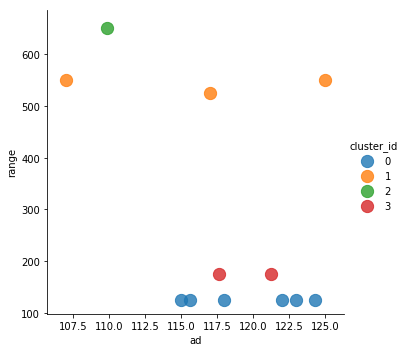

In [68]:
sns.lmplot('ad','range', data=df2, fit_reg=False, 
           scatter_kws={'s':150},
           hue='cluster_id')

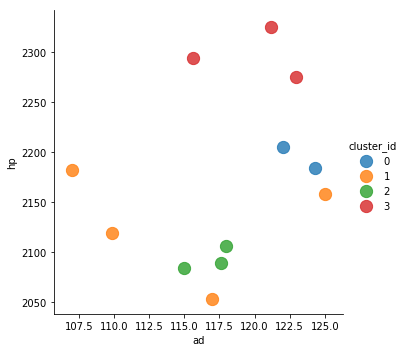

In [71]:
sns.lmplot('ad','hp', data=df, fit_reg=False, 
           scatter_kws={'s':150},
           hue='cluster_id')

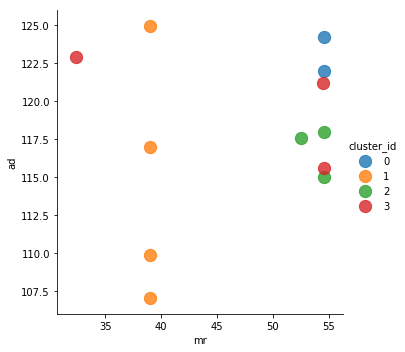

In [75]:
sns.lmplot('mr','ad', data=df, fit_reg=False, 
           scatter_kws={'s':150},
           hue='cluster_id')

In [11]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [116]:
df3_1 = df3.loc[df['cluster_id']==0, :]
df3_1

,ad,range,hp
0,122.00,125,2205.00
6,124.27,125,2184.54


In [117]:
df3_2 = df3.loc[df['cluster_id']==1, :]
df3_2

,ad,range,hp
4,107.04,550,2182.0
9,109.84,650,2119.0
10,116.98,525,2053.0
11,124.98,550,2158.0


In [119]:
df3_3 = df3.loc[df['cluster_id']==2, :]
df3_3

,ad,range,hp
1,117.6,175,2089.00
2,118.0,125,2106.48
3,115.0,125,2084.00


In [121]:
df3_4 = df3.loc[df['cluster_id']==3, :]
df3_4

,ad,range,hp
5,115.60,125,2294.0
7,121.20,175,2325.0
8,122.94,125,2275.0


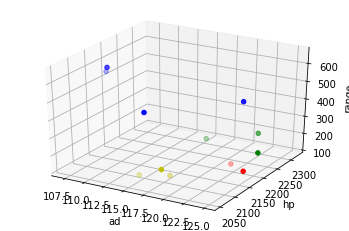

In [125]:
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df3_1['ad'], df3_1['hp'], df3_1['range'], c='r', marker='o')
ax.scatter(df3_2['ad'], df3_2['hp'], df3_2['range'], c='b', marker='o')
ax.scatter(df3_3['ad'], df3_3['hp'], df3_3['range'], c='y', marker='o')
ax.scatter(df3_4['ad'], df3_4['hp'], df3_4['range'], c='g', marker='o')

ax.set_xlabel('ad')
ax.set_ylabel('hp')
ax.set_zlabel('range')

plt.show()

In [14]:
df4_1 = df4.loc[df['cluster_id']==0, :]
df4_2 = df4.loc[df['cluster_id']==1, :]
df4_3 = df4.loc[df['cluster_id']==2, :]
df4_4 = df4.loc[df['cluster_id']==3, :]

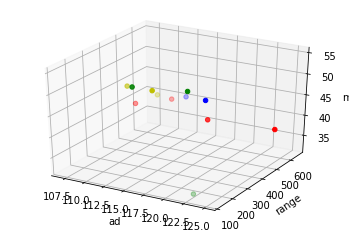

In [18]:
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df4_1['ad'], df4_1['range'], df4_1['mr'], c='r', marker='o')
ax.scatter(df4_2['ad'], df4_2['range'], df4_2['mr'], c='b', marker='o')
ax.scatter(df4_3['ad'], df4_3['range'], df4_3['mr'], c='y', marker='o')
ax.scatter(df4_4['ad'], df4_4['range'], df4_4['mr'], c='g', marker='o')

ax.set_xlabel('ad')
ax.set_ylabel('range')
ax.set_zlabel('mr')

plt.show()

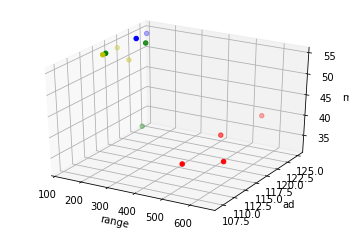

In [19]:
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df4_1['range'], df4_1['ad'], df4_1['mr'], c='r', marker='o')
ax.scatter(df4_2['range'], df4_2['ad'], df4_2['mr'], c='b', marker='o')
ax.scatter(df4_3['range'], df4_3['ad'], df4_3['mr'], c='y', marker='o')
ax.scatter(df4_4['range'], df4_4['ad'], df4_4['mr'], c='g', marker='o')

ax.set_xlabel('range')
ax.set_ylabel('ad')
ax.set_zlabel('mr')

plt.show()